<h3 style="color:brown;text-align: center;"> Ride hailing Analysis - Move the way you want</h3>

<h3 style="color:brown;text-align: center;"> Nisha Pepsi Selvarajan </h3>


In [207]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<h3 style="color:brown;"> Introduction </h3>

<p style="color:#000080;">
As we all know there are two kinds of ride-hailing services in the United States. Many of us are unsure of which service 
offers the cheaper ride. Consumers tend to be keen on savings. Therefore, we constantly check both the services before making
a final decision on which service to use. Such a time-inducing process wastes a lot of our time. That is when I thought there
should be a better way of doing things. This is where the model that I was intending to build comes in handy. The model predicts
the price of rides based on the weather patterns and timing information. Hence, reducing the time and effort needed to ascertain 
the cheaper ride. Cheaper rides = More savings!</p>

<h3 style="color:brown;">Problem Statement for proposed Model</h3>
<p style="color:#000080;"><li style="color:#000080;">Build a model that predicts the price of a commute under different weather conditions.</li>
<li style="color:#000080;">Clustering to analyze ride-sharing data</li>
<li style="color:#000080;">Real time twitter Sentiment Analysis for Uber to predict if customers are happy </li>

</p>

<h3 style="color:brown;"> Requirements</h3>

<p style="color:#000080;"><li style="color:#000080;">folium 0.12.1</li>
<li style="color:#000080;">matplotlib 3.3.4</li>
<li style="color:#000080;">numpy 1.20.1 </li>
<li style="color:#000080;">pandas 1.2.4</li>
<li style="color:#000080;">scipy  1.6.2</li>
<li style="color:#000080;">seaborn 0.11.1</li>
<li style="color:#000080;">session_info 1.0.0</li>
<li style="color:#000080;">sklearn  0.24.1</li>
<li style="color:#000080;">textblob  0.17.1</li>
<li style="color:#000080;">tweepy  4.1.0</li>
<li style="color:#000080;">wordcloud  1.8.1 </li>

</p>


<h2 style="color:brown;">Dataset</h2>

<p style="color:#000080;">The datasets used in this article have been imported from: https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices
The data has been collected from different sources, including real-time data collection using Uber and Lyft API queries. The dataset covers Boston’s selected locations and covers approximately a week’s data from November 2018.</p>

<h3 style="color:brown;"> Code </h3>


In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
from sklearn.metrics import (
    explained_variance_score,
    mean_squared_error,
    mean_absolute_error,
)
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
# Settings for Matplotlib graphs and charts
from pylab import rcParams

rcParams["figure.figsize"] = 12, 8
import warnings

warnings.filterwarnings("ignore")

plt.rcParams["text.color"] = "brown"
plt.rcParams["xtick.color"] = "brown"
plt.rcParams["ytick.color"] = "brown"
plt.rcParams["axes.labelcolor"] = "brown"

pd.set_option("display.max_columns", 17)
pd.set_option("display.max_colwidth", 17)

In [210]:
df_rides = pd.read_csv("cab_rides.csv")
df_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,wind,rain,temp,humidity,latitude,longitude
0,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174...,lyft_line,Shared,0.698970,2.321928,30.959041,0.283662,42.3661,-71.033
1,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827...,lyft_premier,Lux,1.041393,3.459432,46.125755,0.004426,42.3661,-71.033
2,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af...,lyft,Lyft,0.845098,2.807355,37.431399,0.753902,42.3661,-71.033
3,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278...,lyft_luxsuv,Lux Black XL,1.414973,4.700440,62.672530,0.646919,42.3661,-71.033
4,0.44,Lyft,1.540000e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9...,lyft_plus,Lyft XL,0.954243,3.169925,42.265667,-0.911130,42.3661,-71.033


In [211]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
 10  wind              637976 non-null  float64
 11  rain              637976 non-null  float64
 12  temp              637976 non-null  float64
 13  humidity          693071 non-null  float64
 14  latitude          693071 non-null  float64
 15  longitude         693071 non-null  float64
dtypes: float64(10), obje

<h3 style="color:brown;">Before Cleaning Dataset </h3>

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
wind                55095
rain                55095
temp                55095
humidity                0
latitude                0
longitude               0
dtype: int64

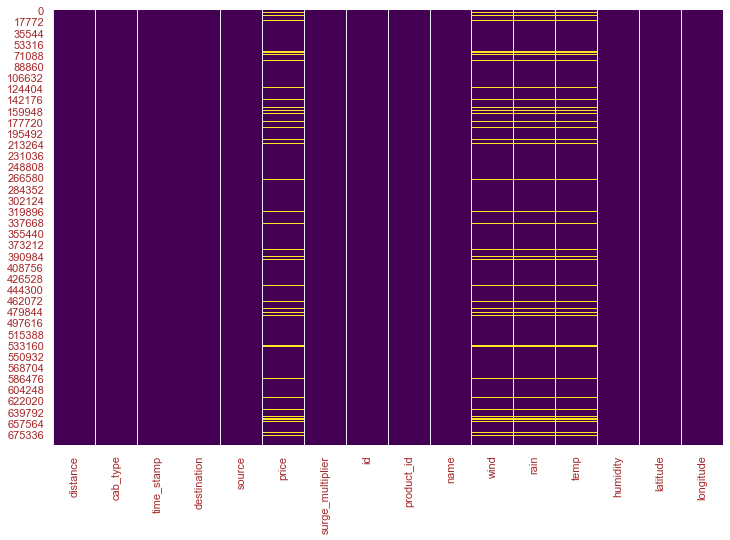

In [212]:
df_rides_weather = df_rides
plt.figure(figsize=(12, 8))
sns.heatmap(df_rides_weather.isnull(), cbar=False, cmap="viridis")
df_rides_weather.isnull().sum()

<h3 style="color:brown;"> Data Cleaning </h3>

In [213]:
# Creating the columns for Month, Hour and Weekdays
df_rides["datetime"] = pd.to_datetime(df_rides["time_stamp"] / 1000, unit="s")
df_rides["date"] = df_rides["datetime"].dt.date
df_rides["day_of_week"] = df_rides["datetime"].dt.dayofweek
df_rides_weather["Month"] = df_rides_weather["datetime"].dt.month
df_rides_weather["Hour"] = df_rides_weather["datetime"].dt.hour
df_rides_weather["Day"] = df_rides_weather["datetime"].dt.strftime("%A")
df_rides_weather.loc[df_rides_weather["name"] == "Taxi", "name"] = "UberTaxi"
df_rides_weather.loc[df_rides_weather["name"] == "Shared", "name"] = "Lyft Shared"
df_rides_weather.loc[df_rides_weather["name"] == "Lux", "name"] = "Lyft Lux"
df_rides_weather.loc[df_rides_weather["name"] == "Lyft", "name"] = "Lyft Regular"
df_rides_weather.loc[df_rides_weather["name"] == "Black SUV", "name"] = "Uber Black SUV"
df_rides_weather.loc[df_rides_weather["name"] == "WAV", "name"] = "Uber WAV"
df_rides_weather.loc[df_rides_weather["name"] == "Black", "name"] = "Uber Black"

In [214]:
df_rides_weather.price = df_rides_weather.price.fillna(df_rides_weather.price.mean())
df_rides_weather.temp = df_rides_weather.temp.fillna(df_rides_weather.temp.mean())
df_rides_weather.rain = df_rides_weather.rain.fillna(df_rides_weather.rain.mean())
df_rides_weather.humidity = df_rides_weather.humidity.fillna(
    df_rides_weather.humidity.mean()
)
df_rides_weather.wind = df_rides_weather.wind.fillna(df_rides_weather.wind.mean())

<p style="color:#000080;">NA values can be replaced by mean or median.If missing column skew is higher, then median should be considered for replacing NA.If missing column skew is lower(data is symmetrical), then mean should be considered for replacing NA
</p>

In [215]:
priceDataFrame = df_rides_weather["price"]
print("Calculating skewness of Price " + str(priceDataFrame.skew(axis=0, skipna=True)))
print("Skewness is greater than 0, so the data must have long tail in right hand side.")
print("So data should be repalced with median")
median_price = df_rides_weather["price"].median()
print("median Price:", median_price)
print("Replacing Price NA values with Median Values")
df_rides_weather["price"].fillna(median_price, inplace=True)
print(
    "Number of null values of Price after replacing NA with median=  "
    + str(df_rides_weather["price"].isnull().sum())
)

Calculating skewness of Price 1.0899667817227607
Skewness is greater than 0, so the data must have long tail in right hand side.
So data should be repalced with median
median Price: 16.0
Replacing Price NA values with Median Values
Number of null values of Price after replacing NA with median=  0


Text(0.5, 1.0, 'After filling missing values')

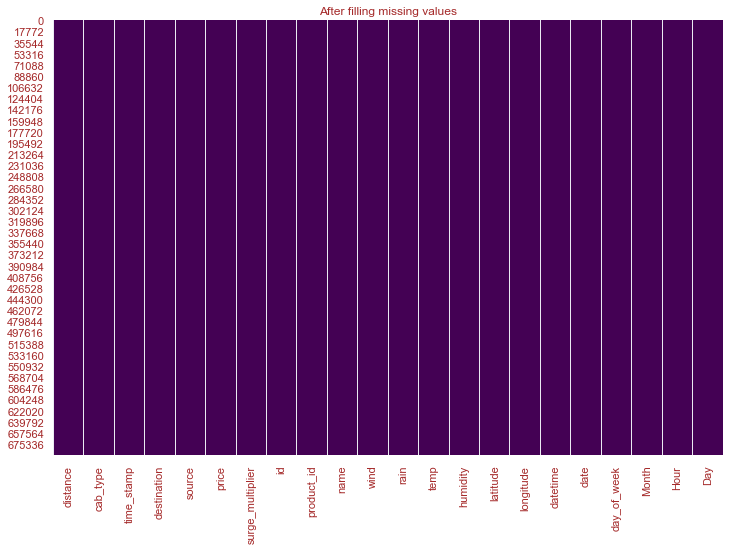

In [216]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_rides_weather.isnull(), cbar=False, cmap="viridis")
plt.title("After filling missing values")

<h3 style="color:brown;"> Detect and Remove the Outliers</h3>

<p style="color:#000080;">The unwanted presence of missing and outlier values in the training data often reduces the accuracy of a model or leads to a biased model. It leads to inaccurate predictions. This is because we don’t analyse the behavior and relationship with other variables correctly. So, it is important to treat missing and outlier values well.Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set<li style="color:#000080;">It increases the error variance and reduces the power of statistical tests</li>
<li style="color:#000080;">If the outliers are non-randomly distributed, they can decrease normality</li>
<li style="color:#000080;">They can bias or influence estimates that may be of substantive interest</li>
<li style="color:#000080;">They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.</li>

</p>

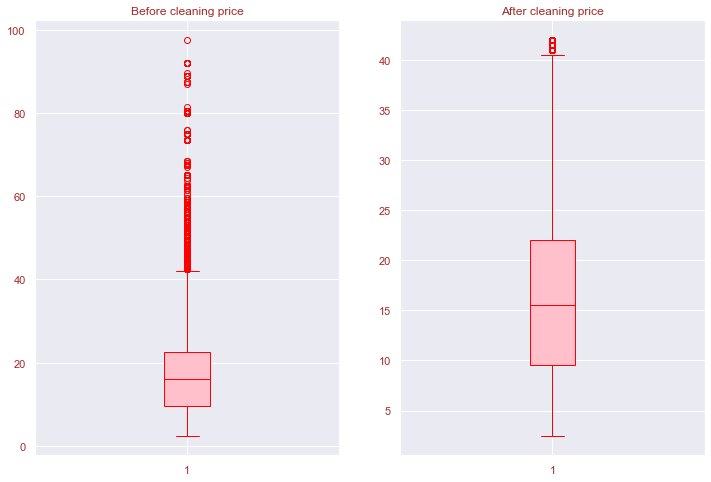

In [217]:
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(
    df_rides_weather["price"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax1.title.set_text("Before cleaning price")

cols = ["price"]  # one or more
Q1 = df_rides_weather[cols].quantile(0.25)
Q3 = df_rides_weather[cols].quantile(0.75)
IQR = Q3 - Q1

df_rides_weather = df_rides_weather[
    ~(
        (df_rides_weather[cols] < (Q1 - 1.5 * IQR))
        | (df_rides_weather[cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

ax2 = plt.subplot(1, 2, 2)
plt.boxplot(
    df_rides_weather["price"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax2.title.set_text("After cleaning price")

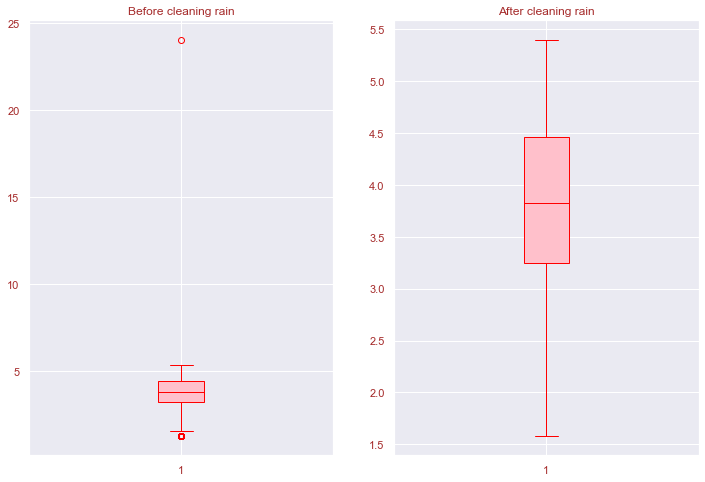

In [218]:
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(
    df_rides_weather["rain"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax1.title.set_text("Before cleaning rain")

cols = ["rain"]  # one or more
Q1 = df_rides_weather[cols].quantile(0.25)
Q3 = df_rides_weather[cols].quantile(0.75)
IQR = Q3 - Q1

df_rides_weather = df_rides_weather[
    ~(
        (df_rides_weather[cols] < (Q1 - 1.5 * IQR))
        | (df_rides_weather[cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

ax2 = plt.subplot(1, 2, 2)
plt.boxplot(
    df_rides_weather["rain"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax2.title.set_text("After cleaning rain")

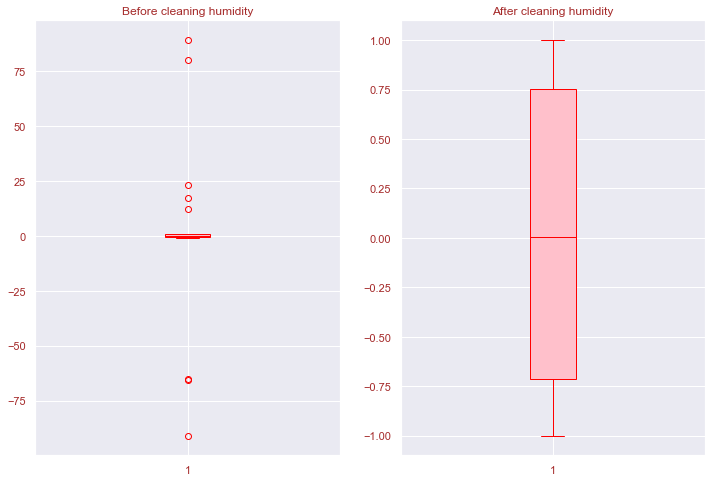

In [219]:
# humidity

ax1 = plt.subplot(1, 2, 1)
plt.boxplot(
    df_rides_weather["humidity"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax1.title.set_text("Before cleaning humidity")


cols = ["humidity"]  # one or more
Q1 = df_rides_weather[cols].quantile(0.25)
Q3 = df_rides_weather[cols].quantile(0.75)
IQR = Q3 - Q1

df_rides_weather = df_rides_weather[
    ~(
        (df_rides_weather[cols] < (Q1 - 1.5 * IQR))
        | (df_rides_weather[cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

ax2 = plt.subplot(1, 2, 2)
plt.boxplot(
    df_rides_weather["humidity"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax2.title.set_text("After cleaning humidity")

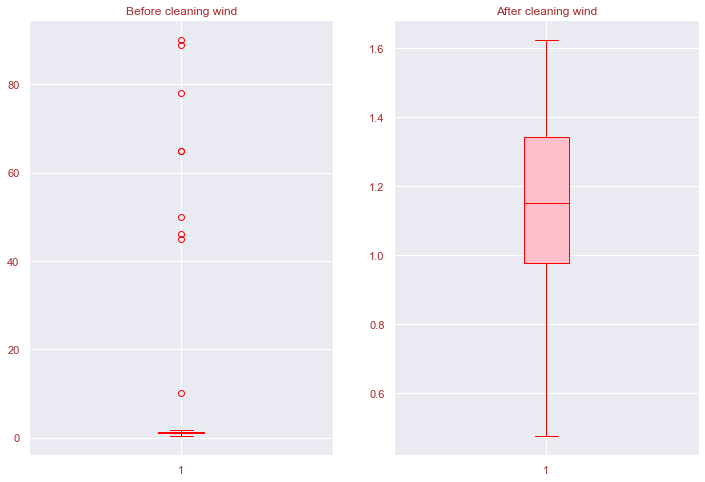

In [220]:
# wind
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(
    df_rides_weather["wind"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax1.title.set_text("Before cleaning wind")


cols = ["wind"]  # one or more
Q1 = df_rides_weather[cols].quantile(0.25)
Q3 = df_rides_weather[cols].quantile(0.75)
IQR = Q3 - Q1

df_rides_weather = df_rides_weather[
    ~(
        (df_rides_weather[cols] < (Q1 - 1.5 * IQR))
        | (df_rides_weather[cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

ax2 = plt.subplot(1, 2, 2)
plt.boxplot(
    df_rides_weather["wind"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax2.title.set_text("After cleaning wind")

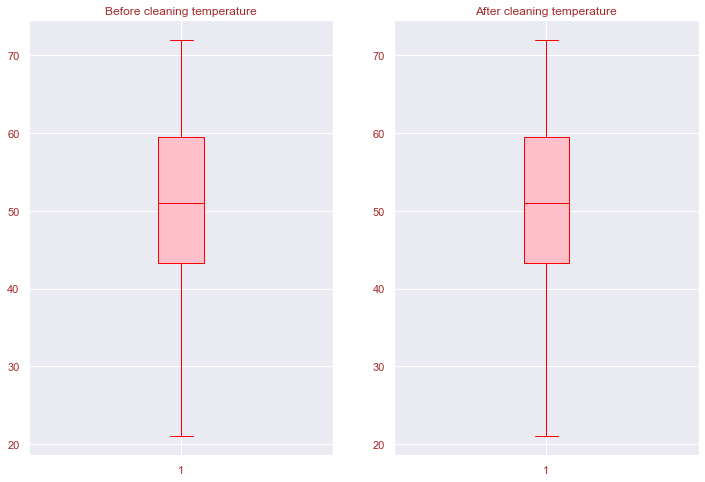

In [221]:
ax1 = plt.subplot(1, 2, 1)
plt.boxplot(
    df_rides_weather["temp"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax1.title.set_text("Before cleaning temperature")


cols = ["temp"]  # one or more
Q1 = df_rides_weather[cols].quantile(0.25)
Q3 = df_rides_weather[cols].quantile(0.75)
IQR = Q3 - Q1

df_rides_weather = df_rides_weather[
    ~(
        (df_rides_weather[cols] < (Q1 - 1.5 * IQR))
        | (df_rides_weather[cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

ax2 = plt.subplot(1, 2, 2)
plt.boxplot(
    df_rides_weather["temp"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="red"),
    capprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    flierprops=dict(color="red", markeredgecolor="red"),
    medianprops=dict(color="red"),
)
ax2.title.set_text("After cleaning temperature")

<h3 style="color:brown;">Visualizations</h2>

<h4 style="color:brown;">1. Histogram of Distance </h4>

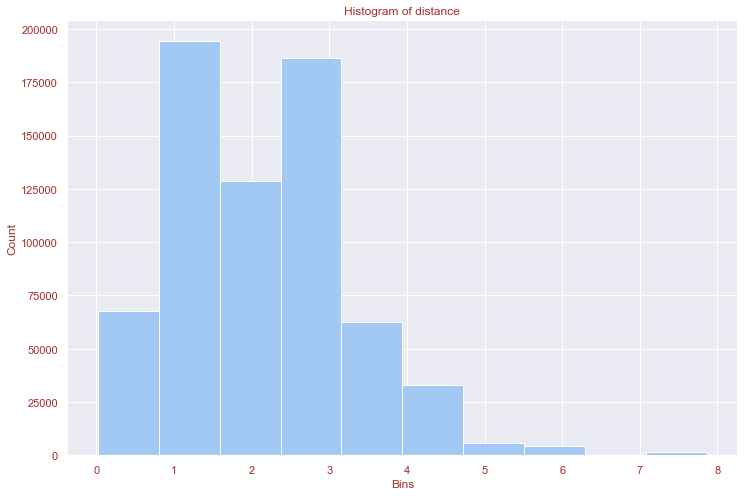

In [222]:
plt.hist(df_rides_weather.distance, bins=10)
plt.xlabel("Bins")
plt.ylabel("Count")
# displaying the title
plt.title("Histogram of distance")
plt.show()

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">There are more rides for 1 & 3 miles. People prefer taking uber rides for shorter distance. </p>


<h4 style="color:brown;">2. Cross Table</h4>

<p style="color:#000080;">A crosstab is a table showing the relationship between two or more variables.Here we are going to plot cross tab between surge multiplier and cab type </p>

In [223]:
# Compute a simple cross tabulation of two (or more) factors.
pd.crosstab(df_rides_weather.surge_multiplier, df_rides_weather.name)

name,Lux Black,Lux Black XL,Lyft Lux,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberTaxi,UberX,UberXL
surge_multiplier,,,,,,,,,,,,,
1.00,47027,44275,47037,47037,51021,47037,54999,53515,55094,55089,55095,55092,55026
1.25,2122,1475,2214,2216,0,2217,0,0,0,0,0,0,0
1.50,832,286,996,1013,0,1012,0,0,0,0,0,0,0
1.75,277,0,425,484,0,478,0,0,0,0,0,0,0
2.00,199,0,380,398,0,362,0,0,0,0,0,0,0
2.50,0,0,0,77,0,46,0,0,0,0,0,0,0
3.00,0,0,0,6,0,1,0,0,0,0,0,0,0


<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">From this dataset, we can infer lyft has surge greater than 1.Uber mostly has surge of 1.We can conclude that lyft price is expensive compared to uber when there is surge multiplier.</p>


<h4 style="color:brown;"> 3. Ride distribution in one day </h4>

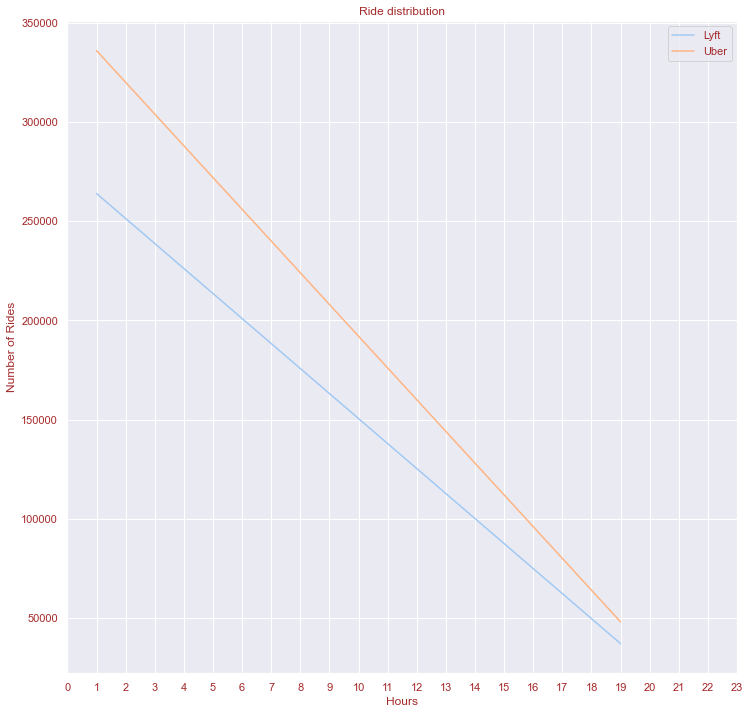

In [224]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(
    df_rides_weather[df_rides_weather["cab_type"] == "Lyft"]
    .groupby("Hour")
    .Hour.count()
    .index,
    df_rides_weather[df_rides_weather["cab_type"] == "Lyft"]
    .groupby("Hour")
    .Hour.count(),
    label="Lyft",
)
ax.plot(
    df_rides_weather[df_rides_weather["cab_type"] == "Uber"]
    .groupby("Hour")
    .Hour.count()
    .index,
    df_rides_weather[df_rides_weather["cab_type"] == "Uber"]
    .groupby("Hour")
    .Hour.count(),
    label="Uber",
)
ax.legend()
ax.set(xlabel="Hours", ylabel="Number of Rides", title="Ride distribution")
plt.xticks(range(0, 24, 1))
plt.show()

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">From this dataset, we can infer that there are more rides in morning compared to the number of rides in the evening.</p>

<h4 style="color:brown;"> 4. Average price and number of rides for each cab type</h4>

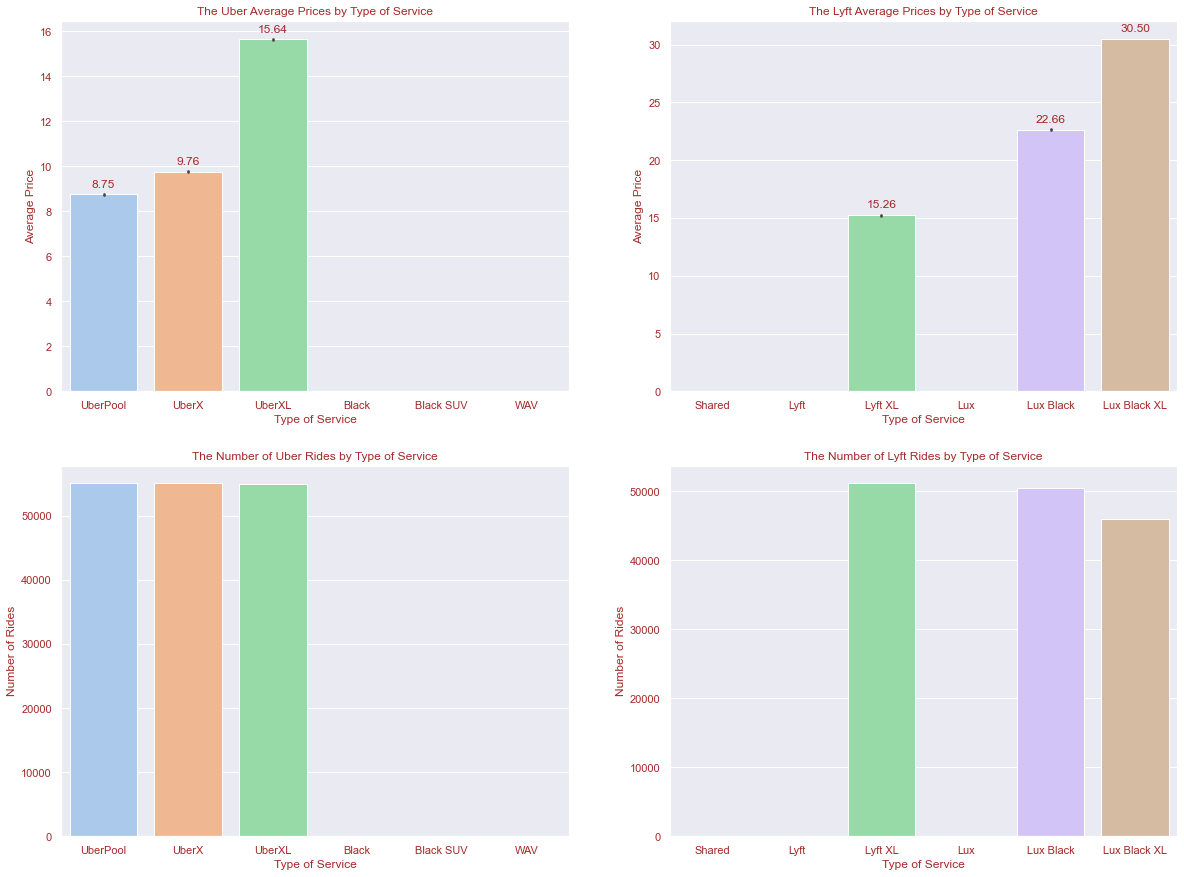

In [225]:
import seaborn as sns

rideshare_data1 = df_rides_weather
uber_order = ["UberPool", "UberX", "UberXL", "Black", "Black SUV", "WAV"]
lyft_order = ["Shared", "Lyft", "Lyft XL", "Lux", "Lux Black", "Lux Black XL"]
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax1 = sns.barplot(
    x=rideshare_data1[rideshare_data1["cab_type"] == "Uber"].name,
    y=rideshare_data1[rideshare_data1["cab_type"] == "Uber"].price,
    ax=ax[0, 0],
    order=uber_order,
)
ax2 = sns.barplot(
    x=rideshare_data1[rideshare_data1["cab_type"] == "Lyft"].name,
    y=rideshare_data1[rideshare_data1["cab_type"] == "Lyft"].price,
    ax=ax[0, 1],
    order=lyft_order,
)
ax3 = sns.barplot(
    x=rideshare_data1[rideshare_data1["cab_type"] == "Uber"]
    .groupby("name")
    .name.count()
    .index,
    y=rideshare_data1[rideshare_data1["cab_type"] == "Uber"]
    .groupby("name")
    .name.count(),
    ax=ax[1, 0],
    order=uber_order,
)
ax4 = sns.barplot(
    x=rideshare_data1[rideshare_data1["cab_type"] == "Lyft"]
    .groupby("name")
    .name.count()
    .index,
    y=rideshare_data1[rideshare_data1["cab_type"] == "Lyft"]
    .groupby("name")
    .name.count(),
    ax=ax[1, 1],
    order=lyft_order,
)
for p in ax1.patches:
    ax1.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
for p in ax2.patches:
    ax2.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
ax1.set(xlabel="Type of Service", ylabel="Average Price")
ax2.set(xlabel="Type of Service", ylabel="Average Price")
ax3.set(xlabel="Type of Service", ylabel="Number of Rides")
ax4.set(xlabel="Type of Service", ylabel="Number of Rides")
ax1.set_title("The Uber Average Prices by Type of Service")
ax2.set_title("The Lyft Average Prices by Type of Service")
ax3.set_title("The Number of Uber Rides by Type of Service")
ax4.set_title("The Number of Lyft Rides by Type of Service")
plt.show()

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Average Price - Luxury cars like UberXL,LuxBlack XL is more expensive compared to economical car type like UberPool & LyftXL.</p>

<p style="color:#000080;">Number Of Rides - Cheaper Cars gets more ride compared to luxury cars.</p>

<h4 style="color:brown;"> 5. Total number of rides for each source & destination per cab type</h4>

green - Lyft
orange - Uber


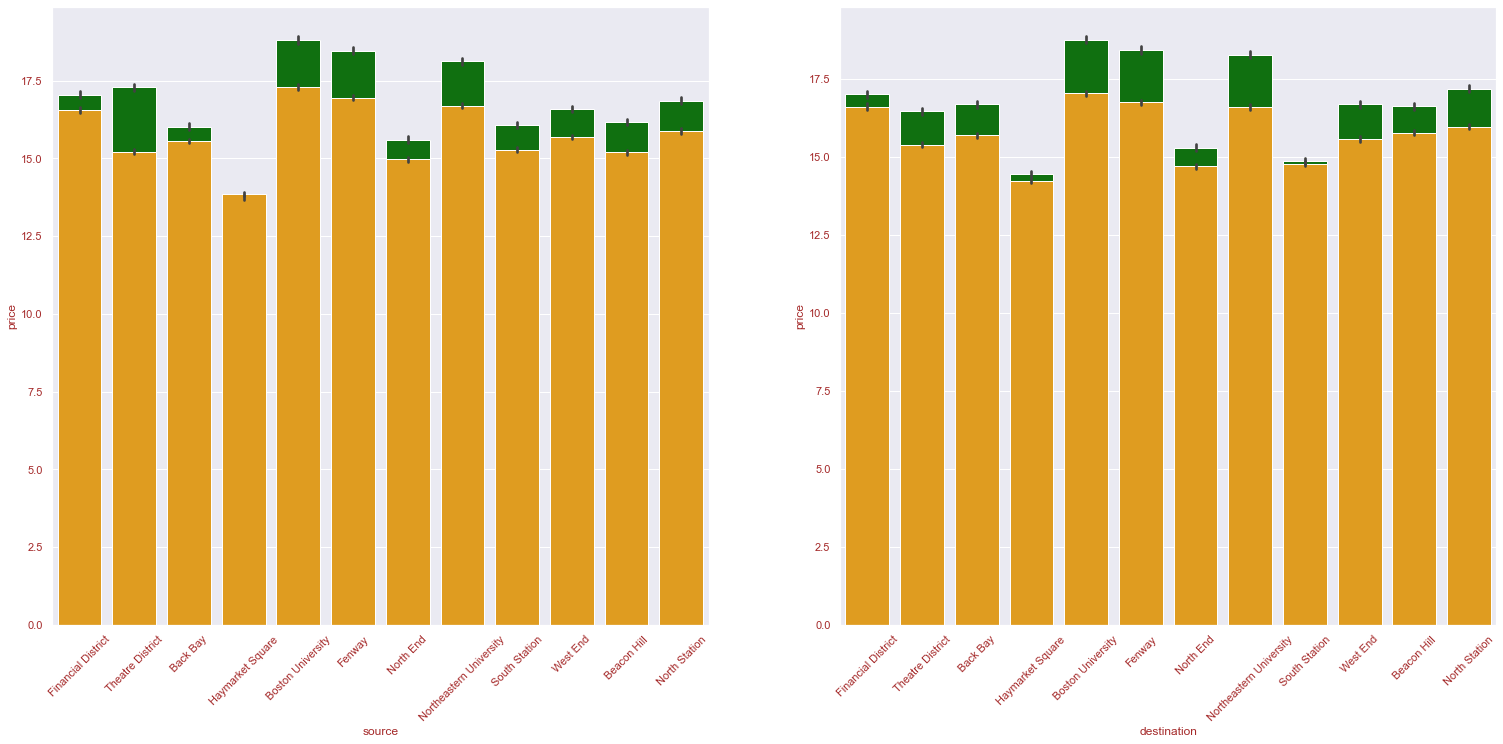

In [226]:
order = [
    "Financial District",
    "Theatre District",
    "Back Bay",
    "Haymarket Square",
    "Boston University",
    "Fenway",
    "North End",
    "Northeastern University",
    "South Station",
    "West End",
    "Beacon Hill",
    "North Station",
]

print("green - Lyft\norange - Uber")
f = plt.figure(figsize=(40, 25))
ax = f.add_subplot(2, 3, 1)
plt.xticks(rotation=45)
sns.barplot(
    x="source",
    y="price",
    data=df_rides_weather[df_rides_weather["cab_type"] == "Lyft"],
    ax=ax,
    order=order,
    color="green",
)
sns.barplot(
    x="source",
    y="price",
    data=df_rides_weather[df_rides_weather["cab_type"] == "Uber"],
    ax=ax,
    order=order,
    color="orange",
)
ax = f.add_subplot(2, 3, 2)
plt.xticks(rotation=45)
sns.barplot(
    x="destination",
    y="price",
    data=df_rides_weather[df_rides_weather["cab_type"] == "Lyft"],
    ax=ax,
    order=order,
    color="green",
)
sns.barplot(
    x="destination",
    y="price",
    data=df_rides_weather[df_rides_weather["cab_type"] == "Uber"],
    ax=ax,
    order=order,
    color="orange",
)
plt.show()

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">In boston's popular destination there are more uber rides than lyft. This might be because of multiple reasons.Either passengers prefer uber in popular destination, or uber routes their driver smartly to nearest popular destinations </p>


<h4 style="color:brown;"> 6. Average price per miles per cab type</h4>

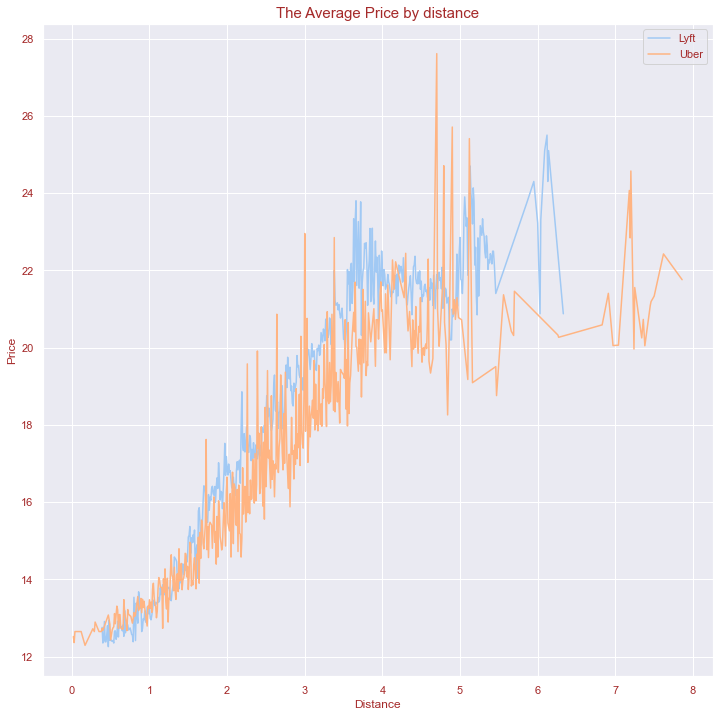

In [227]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(
    df_rides_weather[df_rides_weather["cab_type"] == "Lyft"]
    .groupby("distance")
    .price.mean()
    .index,
    df_rides_weather[df_rides_weather["cab_type"] == "Lyft"]
    .groupby("distance")["price"]
    .mean(),
    label="Lyft",
)
ax.plot(
    df_rides_weather[df_rides_weather["cab_type"] == "Uber"]
    .groupby("distance")
    .price.mean()
    .index,
    df_rides_weather[df_rides_weather["cab_type"] == "Uber"]
    .groupby("distance")["price"]
    .mean(),
    label="Uber",
)

ax.set_title("The Average Price by distance", fontsize=15)
ax.set(xlabel="Distance", ylabel="Price")
ax.legend()
plt.show()

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Price increases with distance for both uber & lyft </p>


<h4 style="color:brown;"> 7. Surge Multiplier Count</h4>

<AxesSubplot:title={'center':'Surge Multiplier Frequency'}>

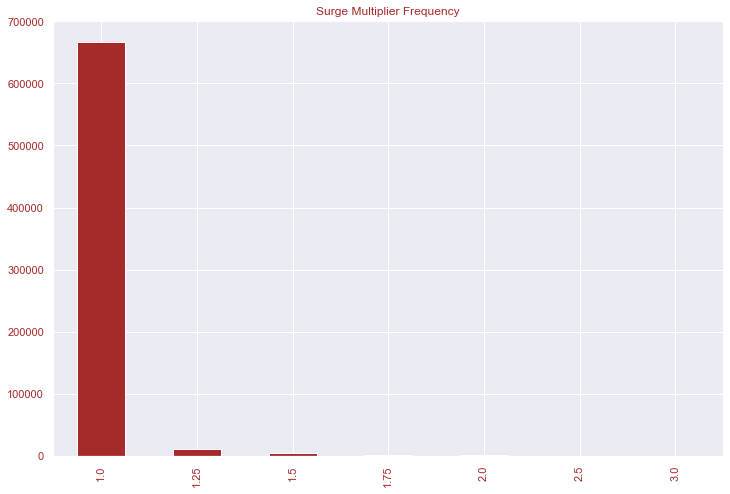

In [228]:
x = df_rides_weather["surge_multiplier"].value_counts()
x.plot.bar(
    x="multiplier",
    y="Number of times",
    title="Surge Multiplier Frequency",
    color="brown",
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Most of the times both Uber & lyft have surge multiplier of 1. </p>


<h4 style="color:brown;">8.Uber Surge Multiplier Count</h4>

<AxesSubplot:title={'center':'Uber Surge Multiplier Frequency'}>

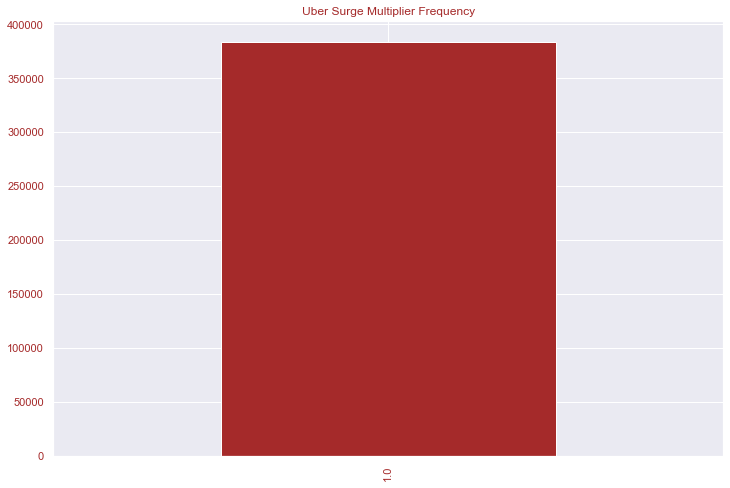

In [229]:
x = df_rides_weather[df_rides_weather["cab_type"] == "Uber"][
    "surge_multiplier"
].value_counts()
x.plot.bar(
    x="multipler uber",
    y="Number of rides",
    title="Uber Surge Multiplier Frequency",
    color="brown",
)

<h4 style="color:brown;"> 9. Lyft Surge Multiplier Count</h4>

<AxesSubplot:title={'center':'Lyft Surge Multiplier Frequency'}>

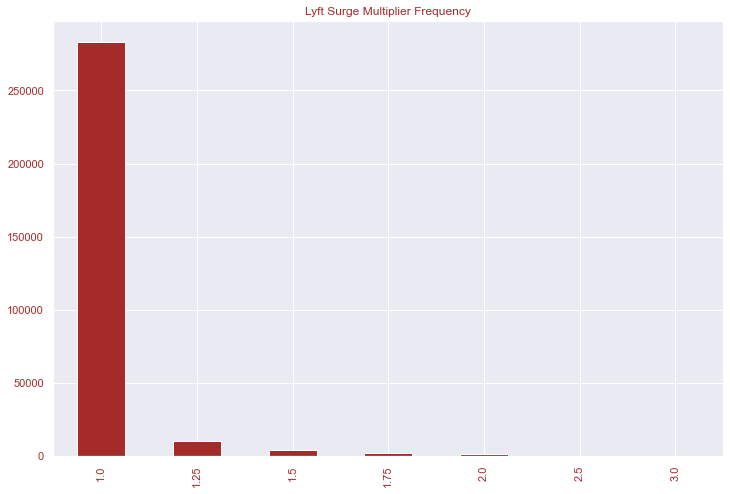

In [230]:
x = df_rides_weather[df_rides_weather["cab_type"] == "Lyft"][
    "surge_multiplier"
].value_counts()
x.plot.bar(
    x="multipler lyft",
    y="Number of rides",
    title="Lyft Surge Multiplier Frequency",
    color="brown",
)

<h4 style="color:brown;">10. Count of high cost rides per each cab type.</h4>

<AxesSubplot:title={'center':'High cost rides per cab type'}>

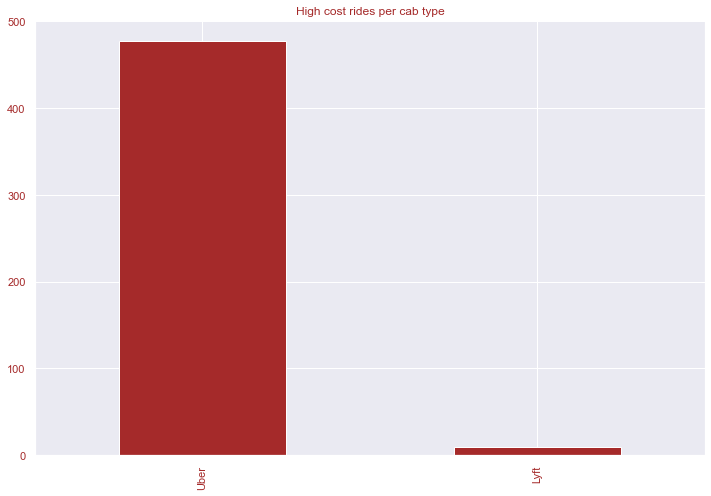

In [231]:
df_rides_weather["price/distance"] = (
    df_rides_weather["price"] / df_rides_weather["distance"]
)

high_rates = df_rides_weather[df_rides_weather["price/distance"] > 80]
z = high_rates["cab_type"].value_counts()
z.plot.bar(
    x="Cab Type",
    y="Number of rides",
    title="High cost rides per cab type",
    color="brown",
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">There are more expensive rides for uber compared to lyft. </p>


<h4 style="color:brown;">11. High cost rides for which distance?</h4>

<AxesSubplot:title={'center':'High cost rides per distance'}>

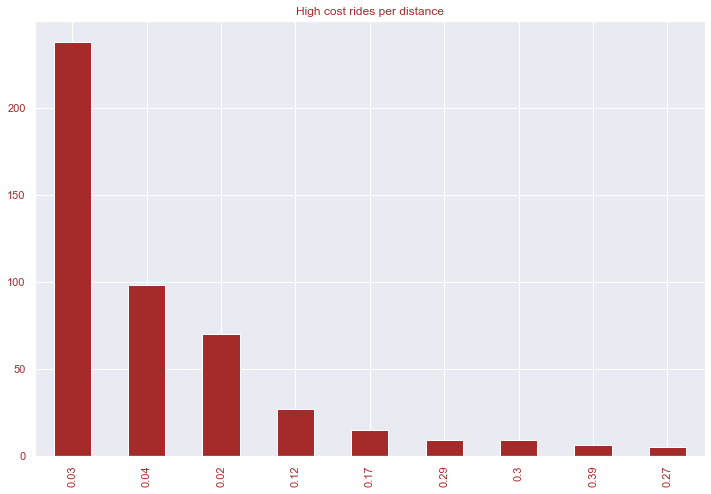

In [232]:
z = high_rates[high_rates["cab_type"] == "Uber"]["distance"].value_counts()
z.plot.bar(
    x="Cab Type",
    y="Number of rides",
    title="High cost rides per distance",
    color="brown",
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Higher costs can also be correlated with cancelled rides in Uber & Lyft. According to the dataset,
Uber & Lyft have higher cancellation fees compared to the normal rides.</p>


<h4 style="color:brown;">12. Average price per distance for cab type</h4>

source


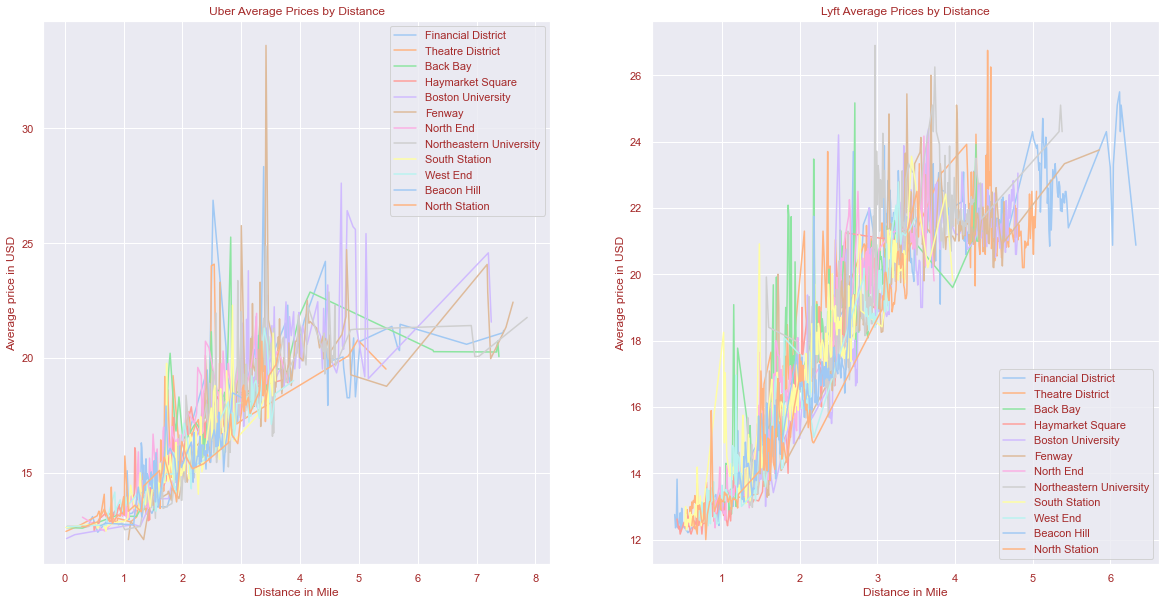

In [233]:
order = [
    "Financial District",
    "Theatre District",
    "Back Bay",
    "Haymarket Square",
    "Boston University",
    "Fenway",
    "North End",
    "Northeastern University",
    "South Station",
    "West End",
    "Beacon Hill",
    "North Station",
]

print("source")
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
df_uber = df_rides_weather[df_rides_weather["cab_type"] == "Uber"]
for i, col in enumerate(order):
    x = df_uber[df_uber["source"] == col].groupby("distance").price.mean().index
    y = df_uber[df_uber["source"] == col].groupby("distance").price.mean()
    ax[0].plot(x, y, label=col)

ax[0].set_title("Uber Average Prices by Distance")
ax[0].set(xlabel="Distance in Mile", ylabel="Average price in USD")
ax[0].legend()

df_lyft = df_rides_weather[df_rides_weather["cab_type"] == "Lyft"]
for i, col in enumerate(order):
    x = df_lyft[df_lyft["source"] == col].groupby("distance").price.mean().index
    y = df_lyft[df_lyft["source"] == col].groupby("distance").price.mean()
    ax[1].plot(x, y, label=col)
ax[1].set(xlabel="Distance in Mile", ylabel="Average price in USD")
ax[1].set_title("Lyft Average Prices by Distance")
ax[1].legend()
plt.show()

<h4 style="color:brown;">12. Cab frequency corresponding to temperature increase</h4>

Text(0.5, 0.98, 'Value of Tips Given to Waiters, by Days of the Week and Sex')

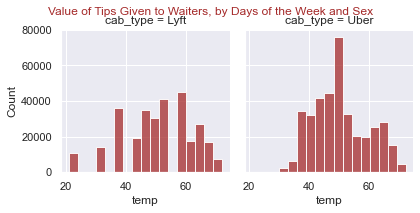

In [234]:
# Plot the temperature distribution by cab_type
sns.set_theme(style="darkgrid", palette="pastel")
ax = sns.displot(
    rideshare_data1,
    x="temp",
    col="cab_type",
    binwidth=3,
    height=3,
    facet_kws=dict(margin_titles=True),
    color="brown",
)

ax.fig.suptitle(
    "Value of Tips Given to Waiters, by Days of the Week and Sex",
    fontsize=12,
    color="brown",
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">When temperature is around 50, people take more uber & lyft rides.From this plot, we know that weather plays important role in number of rides.</p>


<h4 style="color:brown;">13. Price Per Cab Type</h4>

Text(0.5, 1.0, 'Price Per Cab Type')

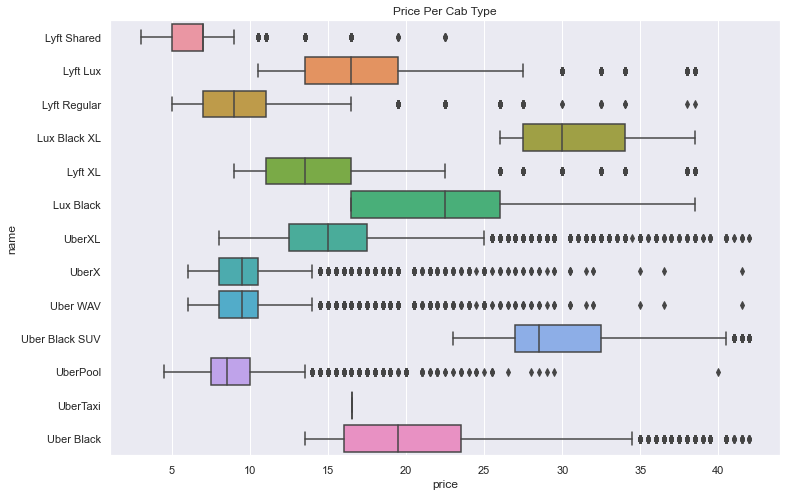

In [235]:
sns.boxplot(x="price", y="name", data=df_rides_weather, orient="h").set_title(
    "Price Per Cab Type"
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Box Plot will help us to know where the average value lies & how many outliers are present. From this plot, we can infer that we need to clean the outliers of price for each cab type before analysis.</p>


<h4 style="color:brown;">14. Number Of Rides Per Cab Type</h4>

Text(0.5, 1.0, 'Number Of Rides Per Cab Type')

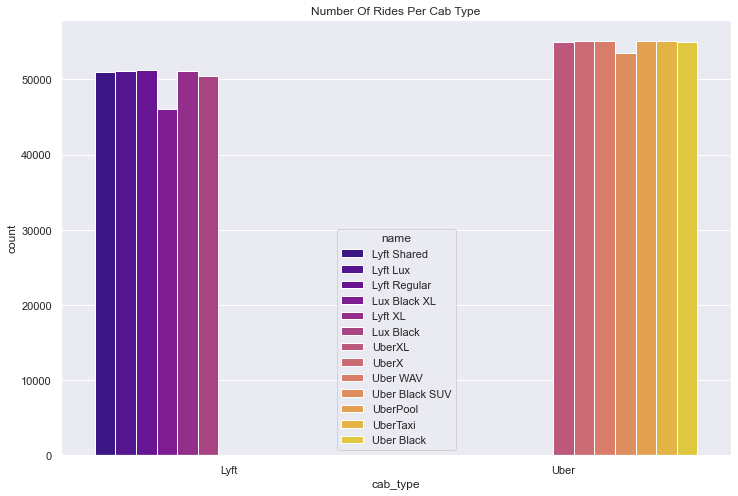

In [236]:
# Countplot
sns.countplot(
    df_rides_weather["cab_type"], hue=df_rides_weather["name"], palette="plasma"
).set_title("Number Of Rides Per Cab Type")

<h4 style="color:brown;">15. Top and least 5 source - destinations for surge</h4>

[Text(0, 0, 'Back Bay Boston University'),
 Text(1, 0, 'Back Bay Fenway'),
 Text(2, 0, 'Back Bay Northeastern University'),
 Text(3, 0, 'Theatre District North End'),
 Text(4, 0, 'Theatre District South Station'),
 Text(5, 0, 'North Station Haymarket Square'),
 Text(6, 0, 'West End Haymarket Square'),
 Text(7, 0, 'North Station Boston University'),
 Text(8, 0, 'West End Fenway'),
 Text(9, 0, 'West End Northeastern University')]

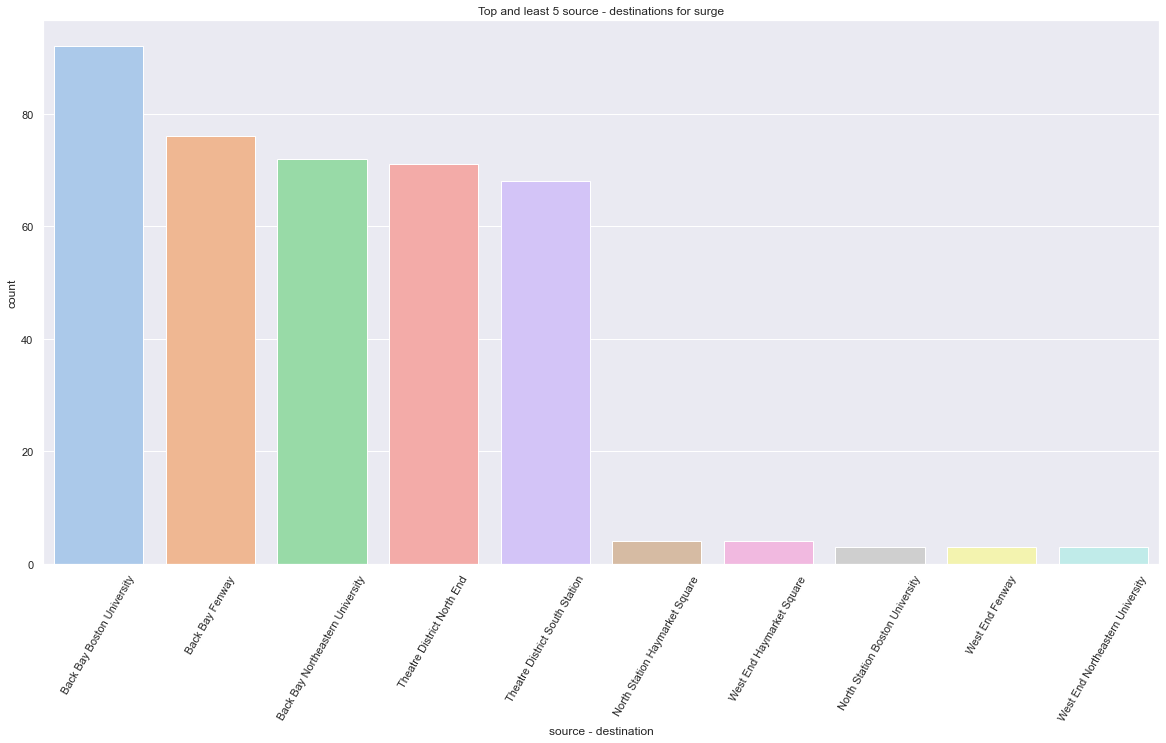

In [237]:
high_surge_rows = df_rides_weather[df_rides_weather["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(["source", "destination"]).size().reset_index()
loc_wise_surge.columns = ["source", "destination", "count"]
loc_wise_surge.sort_values(inplace=True, ascending=False, by=["count"])

highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)
# highest_destination_surge
destination_surge_df = highest_destination_surge.append(
    lowest_destination_surge, ignore_index=True
)
destination_surge_df["source - destination"] = (
    destination_surge_df["source"] + " " + destination_surge_df["destination"]
)
plt.figure(figsize=(20, 10))
g = sns.barplot(data=destination_surge_df, x="source - destination", y="count")
g.set_title("Top and least 5 source - destinations for surge")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Black Bay BU & Fenway has higher surge multiplier.We can conclude that there are more demands for driver in these areas compared to Northeastern University. Uber can use these data to strategically place the driver in the most demand locations.</p>


<h4 style="color:brown;">15. Day wise surge frequency</h4>

Text(0.5, 1.0, 'Day wise Surge')

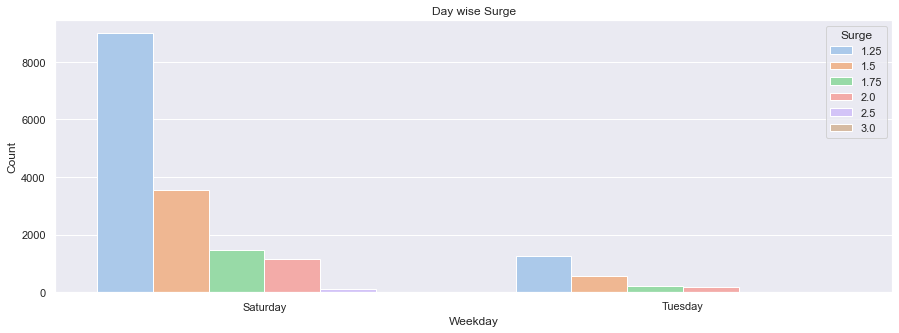

In [238]:
df_rides_weather.loc[
    (df_rides_weather.Hour >= 6) & (df_rides_weather.Hour < 12), "time_of_day"
] = "Morning"
df_rides_weather.loc[
    (df_rides_weather.Hour >= 12) & (df_rides_weather.Hour < 15), "time_of_day"
] = "Afternoon"
df_rides_weather.loc[
    (df_rides_weather.Hour >= 15) & (df_rides_weather.Hour < 18), "time_of_day"
] = "Evening"
df_rides_weather.loc[
    (df_rides_weather.Hour >= 18) | (df_rides_weather.Hour < 6), "time_of_day"
] = "Night"


high_surge_dataset = df_rides_weather[df_rides_weather["surge_multiplier"] > 1]
t_high_surge = pd.DataFrame(
    high_surge_dataset.groupby(["Day", "surge_multiplier"]).size().reset_index()
)
t_high_surge.columns = ["Weekday", "Surge", "Count"]
plt.figure(figsize=(15, 5))
sns.barplot(x="Weekday", y="Count", hue="Surge", data=t_high_surge).set_title(
    "Day wise Surge"
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Weekends have higher surge than weekdays. It might be because more people take rides on weekends compared to weekdays.</p>


<h4 style="color:brown;">16. Time wise surge frequency</h4>

Text(0.5, 1.0, 'Time of Day wise Surge')

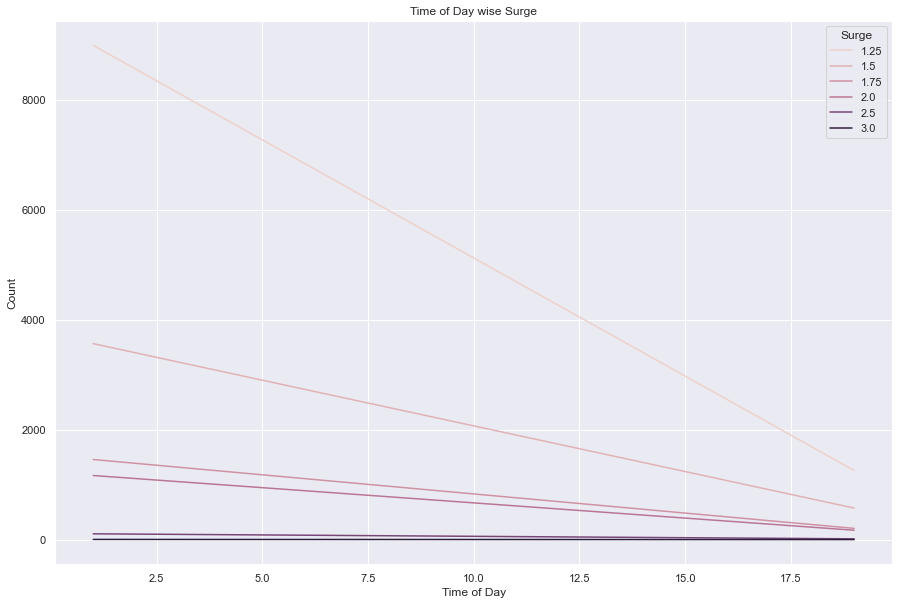

In [239]:
td_high_surge = pd.DataFrame(
    high_surge_dataset.groupby(["Day", "surge_multiplier", "Hour"]).size().reset_index()
)
td_high_surge.columns = ["Weekday", "Surge", "Time of Day", "Count"]
plt.figure(figsize=(15, 10))
sns.lineplot(x="Time of Day", y="Count", hue="Surge", data=td_high_surge).set_title(
    "Time of Day wise Surge"
)

<h5 style="color:brown;">Interpretation </h5>

<p style="color:#000080;">Lyft’s Prime Timing happens the most during nighttime.
Morning rush hours also contribute to the surge.
A surge is less likely to happen during the afternoon and evening.</p>


 <h3 style="color:brown;">Categorical encoding</h3>

In [241]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_rides_weather.source = le.fit_transform(df_rides_weather.source.values)
df_rides_weather.destination = le.fit_transform(df_rides_weather.destination.values)
df_rides_weather.cab_type = le.fit_transform(df_rides_weather.cab_type.values)
df_rides_weather.name = le.fit_transform(df_rides_weather.name.values)
df_rides_weather.product_id = le.fit_transform(df_rides_weather.product_id.values)
df_rides_weather.time_of_day = le.fit_transform(df_rides_weather.time_of_day.values)
df_rides_weather.Day = le.fit_transform(df_rides_weather.Day.values)
df_rides_weather.Month = le.fit_transform(df_rides_weather.Month.values)
df_rides_weather.Hour = le.fit_transform(df_rides_weather.Hour.values)

<h3 style="color:brown;">Data Correlation</h3>


<AxesSubplot:>

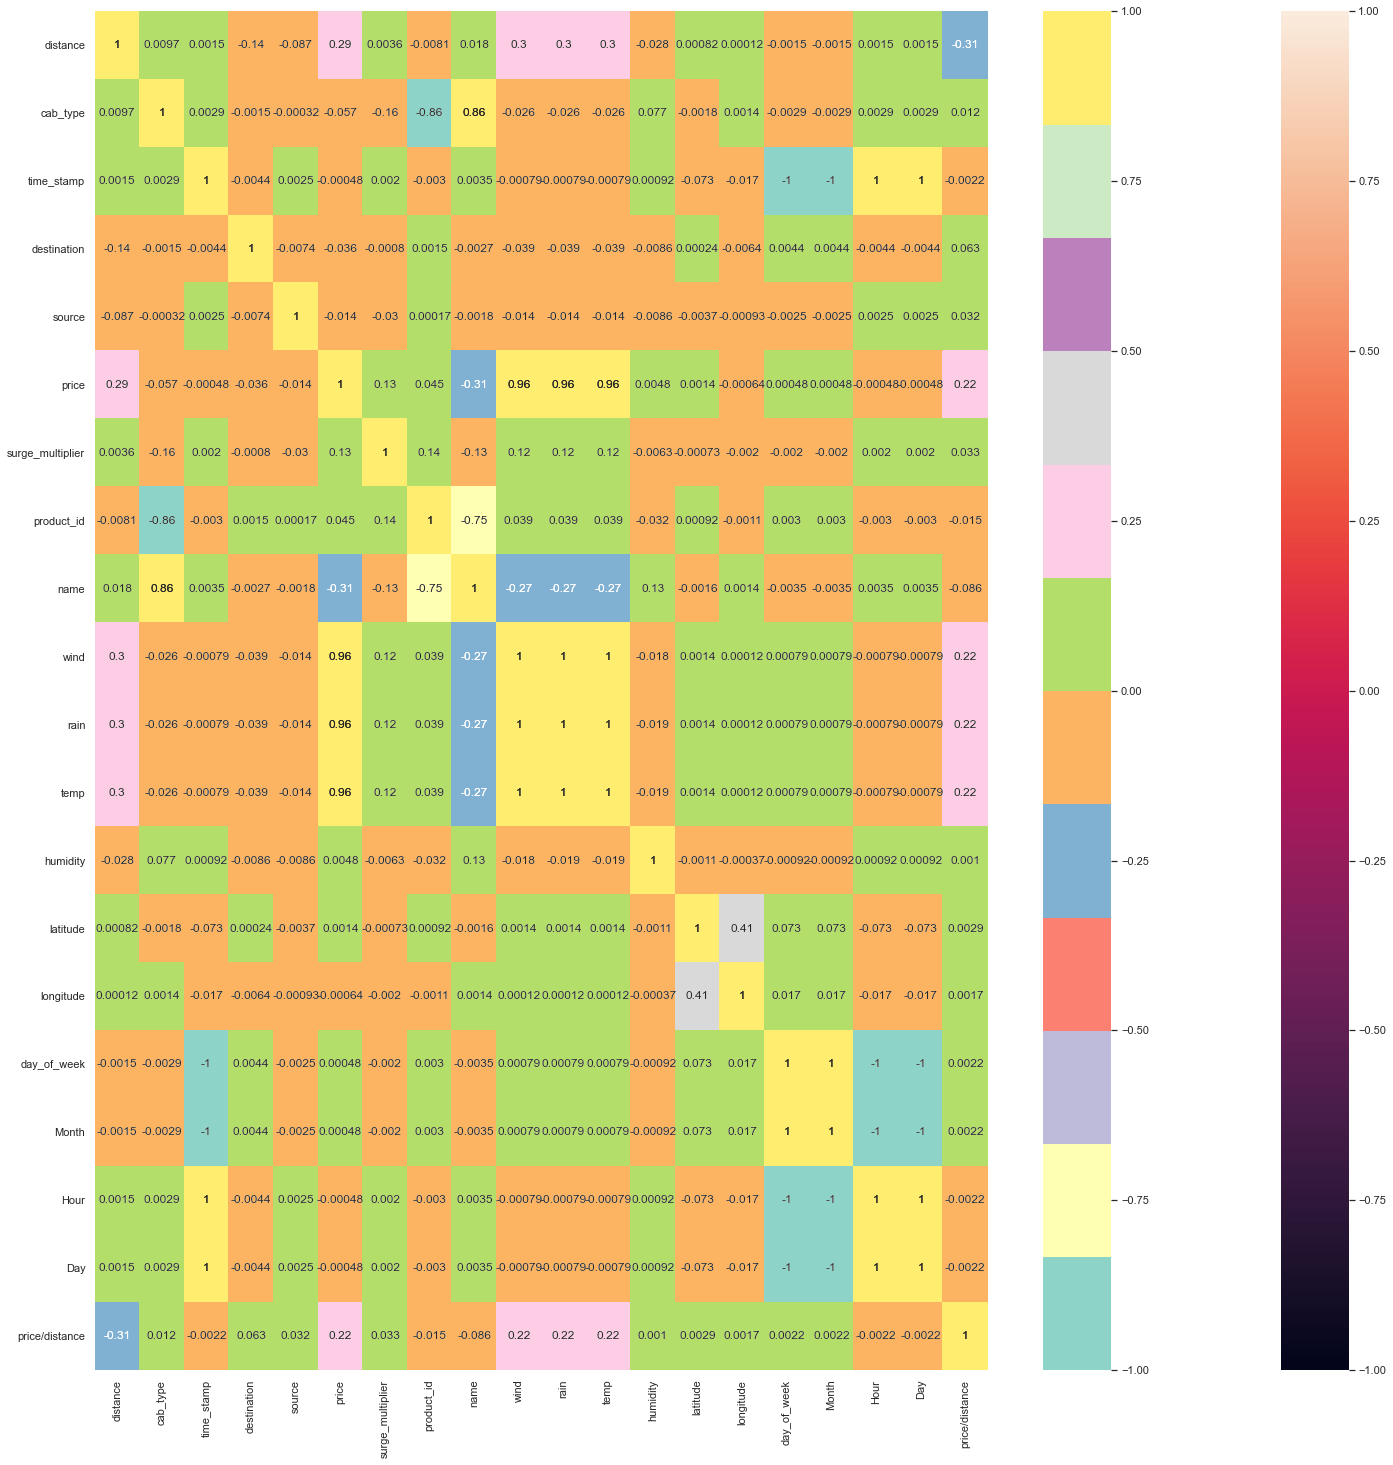

In [242]:
plt.figure(figsize=(25, 25))
df_rides_corr = df_rides_weather
df_rides_corr = df_rides_corr.drop("time_of_day", axis=1)
vg_corr = df_rides_corr.corr()
sns.heatmap(
    vg_corr,
    xticklabels=vg_corr.columns.values,
    yticklabels=vg_corr.columns.values,
    annot=True,
)
sns.heatmap(vg_corr, cmap=sns.color_palette("Set3"), annot=True)

<h3 style="color:brown;">ML Problem - Analyzing the Effect of Weather on Uber Ridership</h3>

<p style="color:#000080;">The weather is likely to have a significant impact on the rise in prices of Uber fares.Different weather conditions will certainly affect the price increase in different ways and at different levels: we assume that weather conditions such as clouds or clearness do not have the same effect on inflation prices as weather conditions such as rain or temperature. </p>


<h4 style="color:brown;">LASSO Regression</h4>

<p style="color:#000080;"><ul style="color:#000080;"> LASSO regression is the special type of linear model that adds the constraint to prevent having unnecessary variables in the model. 
Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty.This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.This penalty allows some coefficient values to go to the value of zero, allowing input variables to be effectively removed from the model, providing a type of automatic feature selection.</ul></p>

<p style="color:##000080;"><ul style="color:#000080;">
Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.</ul></p>

0.08136631475157981
train score is 0.923425224730129
test score is 0.9231681765226436
Best alpha(Constant that multiplies the L1 term. Defaults to 1.0) using built-in LassoCV: 0.081366
Best score(Coefficient of determination of the prediction.) using built-in LassoCV: 0.923168
temp        0.777197
wind        0.000000
rain        0.000000
humidity    0.107065
dtype: float64
Lasso picked 2 variables and eliminated the other 2 variables
accuracy :0.9231681765226436
mean_absolute_error :1.6574362539567302
mean_squared_error :5.261740036134753
variance_score :0.9231685618629528


Text(0.5, 1.0, 'Feature importance using Lasso Model')

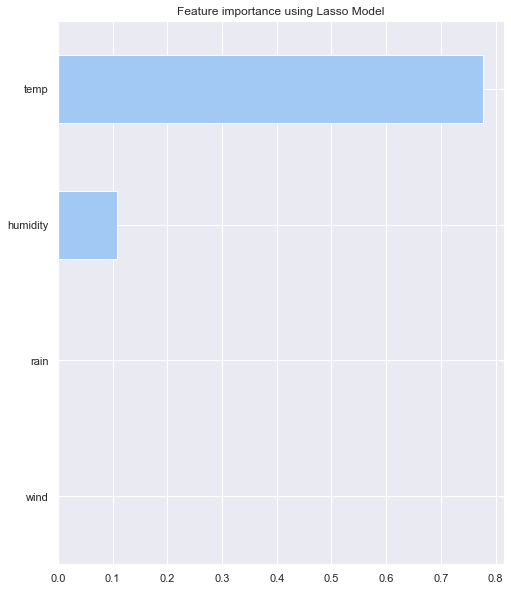

In [243]:
# Lasso Regression is an extension of linear regression that adds a regularization penalty to the loss function during training.

from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

x = df_rides_weather[["temp", "wind", "rain", "humidity"]]
Y = df_rides_weather["price"]

# train test split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(
    x, Y, test_size=0.20, random_state=325
)

# cv
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

# define model
lyft_lasso_model = LassoCV(cv=cv)

# fit model
lyft_lasso_model = lyft_lasso_model.fit(df_X_train, df_y_train)

# display lambda that produced the lowest test MSE
print(lyft_lasso_model.alpha_)

print("train score is", lyft_lasso_model.score(df_X_train, df_y_train))
print("test score is", lyft_lasso_model.score(df_X_test, df_y_test))
print(
    "Best alpha(Constant that multiplies the L1 term. Defaults to 1.0) using built-in LassoCV: %f"
    % lyft_lasso_model.alpha_
)
print(
    "Best score(Coefficient of determination of the prediction.) using built-in LassoCV: %f"
    % lyft_lasso_model.score(df_X_test, df_y_test)
)
coef = pd.Series(lyft_lasso_model.coef_, index=x.columns)
print(coef)
print(
    "Lasso picked "
    + str(sum(coef != 0))
    + " variables and eliminated the other "
    + str(sum(coef == 0))
    + " variables"
)

lr_predictions = lyft_lasso_model.predict(df_X_test)

MAE_lr = mean_absolute_error(df_y_test, lr_predictions)
MSE_lr = mean_squared_error(df_y_test, lr_predictions)
var_lr = explained_variance_score(df_y_test, lr_predictions)

print("accuracy :" + str(lyft_lasso_model.score(df_X_test, df_y_test)))
print("mean_absolute_error :" + str(MAE_lr))
print("mean_squared_error :" + str(MSE_lr))
print("variance_score :" + str(var_lr))


imp_coef = coef.sort_values()
import matplotlib

matplotlib.rcParams["figure.figsize"] = (8.0, 10.0)
imp_coef.plot(kind="barh")
plt.title("Feature importance using Lasso Model")

<h4 style="color:brown;">Linear Regression</h4>

<p> <ul  style="color:#000080;">The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. </ul>
<ul  style="color:#000080;">The higher the Rsquared value is, the more consistent and closer to the line of best fit it is.</ul>
<ul  style="color:#000080;">In terms of linear regression, variance is a measure of how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean. The goal is to have a value that is low.</ul>
<ul style="color:#000080;">Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.</ul>
<ul style="color:#000080;">RMSE is the Root of the Mean of the Square of Errors and MAE is the Mean of Absolute value of Errors.The lower the MAE for a given model, the more closely the model is able to predict the actual values.</ul>

</p>

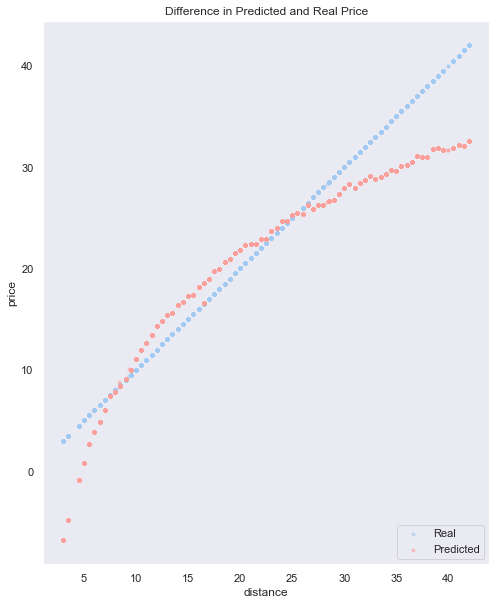

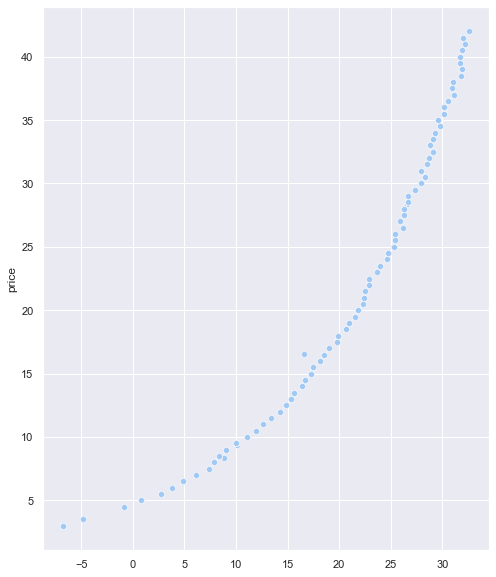

accuracy :0.9240368869428721
mean_absolute_error :1.6006385159438532
mean_squared_error :5.208908107943622
variance_score :0.9240371105780315
Linear Regression Lyft train R squared: 0.9240
Linear Regression Lyft test R squared: 0.9240
Linear Regression Lyft test RMSE: 2.2823
Linear Uber Accuracy: 85.17 %.


In [244]:
from sklearn.linear_model import LinearRegression

X = df_rides_weather[["temp", "wind", "rain", "humidity"]]
y = df_rides_weather["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101
)

lr = LinearRegression()
lm_model = lr.fit(X_train, y_train)
lr_predictions = lm_model.predict(X_test)


# Define x axis
x_axis = y_test

# Build scatterplot
plt.scatter(x_axis, y_test, c="b", alpha=0.5, marker=".", label="Real")
plt.scatter(x_axis, lr_predictions, c="r", alpha=0.5, marker=".", label="Predicted")
plt.xlabel("distance")
plt.ylabel("price")
plt.title("Difference in Predicted and Real Price")
plt.grid(color="#D3D3D3", linestyle="solid")
plt.legend(loc="lower right")
plt.show()


# Evaluate model
from sklearn.metrics import (
    explained_variance_score,
    mean_squared_error,
    mean_absolute_error,
)

sns.scatterplot(lr_predictions, y_test)
plt.show()

MAE_lr = mean_absolute_error(y_test, lr_predictions)
MSE_lr = mean_squared_error(y_test, lr_predictions)
var_lr = explained_variance_score(y_test, lr_predictions)

print("accuracy :" + str(lr.score(X_test, y_test)))
print("mean_absolute_error :" + str(MAE_lr))
print("mean_squared_error :" + str(MSE_lr))
print("variance_score :" + str(var_lr))


l_lr_train_r2 = lr.score(X_train, y_train)
l_lr_test_r2 = lr.score(X_test, y_test)
print("Linear Regression Lyft train R squared: %.4f" % l_lr_train_r2)
print("Linear Regression Lyft test R squared: %.4f" % l_lr_test_r2)

lyft_lr_mse = mean_squared_error(lr_predictions, y_test)
lyft_lr_rmse = np.sqrt(lyft_lr_mse)
print("Linear Regression Lyft test RMSE: %.4f" % lyft_lr_rmse)

errors = abs(lr_predictions - y_test)
mape = 100 * (errors / y_test)
lyft_lr_accuracy = 100 - np.mean(mape)
print("Linear Uber Accuracy:", round(lyft_lr_accuracy, 2), "%.")


<h4 style="color:brown;">Ridge Regression</h4>

<p> <ul  style="color:#000080;">Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated).</ul>
<ul  style="color:#000080;"> In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.</ul>
<ul  style="color:#000080;">Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.</ul>
</p>


Fitting 10 folds for each of 48 candidates, totalling 480 fits
0.9236266113474834
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}
mean_absolute_error :1.630617686054133
mean_squared_error :5.240401642128678
variance :0.9235777369870558
accuracy :0.9235776070231094


<AxesSubplot:ylabel='price'>

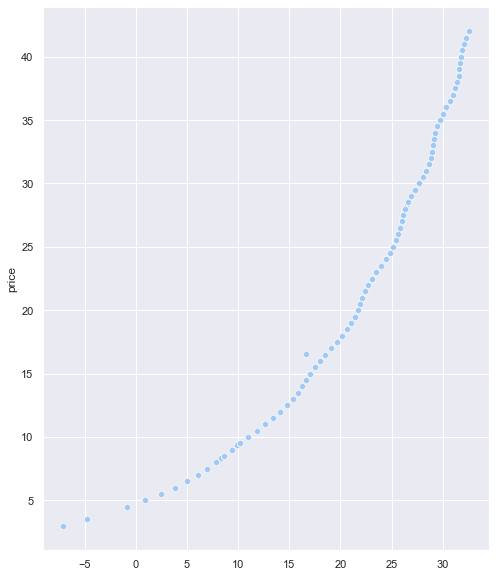

In [245]:
# ridge is l2 penalty
ridge = Ridge()
parameters = {
    "alpha": [0.001, 0.005, 0.01, 0.1, 0.5, 1],
    "normalize": [True, False],
    "tol": [1e-06, 5e-06, 1e-05, 5e-05],
}
grid_ridge = GridSearchCV(
    estimator=ridge,
    cv=10,
    verbose=1,
    scoring="explained_variance",
    param_grid=parameters,
)

grid_ridge.fit(df_X_train, df_y_train)

print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

ridge_optimized = Ridge(alpha=1, normalize=False, tol=1e-06)

ridge_optimized.fit(X_train, y_train)

ridge_pred = ridge_optimized.predict(X_test)

MAE_ridge = mean_absolute_error(y_test, ridge_pred)
MSE_ridge = mean_squared_error(y_test, ridge_pred)
var_ridge = explained_variance_score(y_test, ridge_pred)
print("mean_absolute_error :" + str(MAE_ridge))
print("mean_squared_error :" + str(MSE_ridge))
print("variance :" + str(var_ridge))
print("accuracy :" + str(ridge_optimized.score(X_test, y_test)))
sns.scatterplot(ridge_pred, y_test)

<h4 style="color:brown;">RandomForestRegressor</h4>

<p> <ul  style="color:#000080;">A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.
</ul>
<ul  style="color:#000080;"> The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.</ul>
</p>


In [246]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on training data
rf.fit(df_X_train, df_y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(df_X_test)
# Calculate the absolute errors
errors = abs(predictions - df_y_test)
# Print out the mean absolute error (mae)
print("Mean Absolute Error:", round(np.mean(errors), 2), "degrees.")

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / df_y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print("Accuracy:", round(accuracy, 2), "%.")


MAE_rf = mean_absolute_error(df_y_test, predictions)
MSE_rf = mean_squared_error(df_y_test, predictions)
print("mae: " + str(MAE_rf))
print("mse: " + str(MSE_rf))
print("accuracy :" + str(rf.score(df_X_test, df_y_test)))
print("variance :" + str(explained_variance_score(df_y_test, predictions)))

Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.
mae: 3.6504206902088137e-08
mse: 1.8251905498952958e-10
accuracy :0.9999999999973349
variance :0.9999999999973349


<AxesSubplot:>

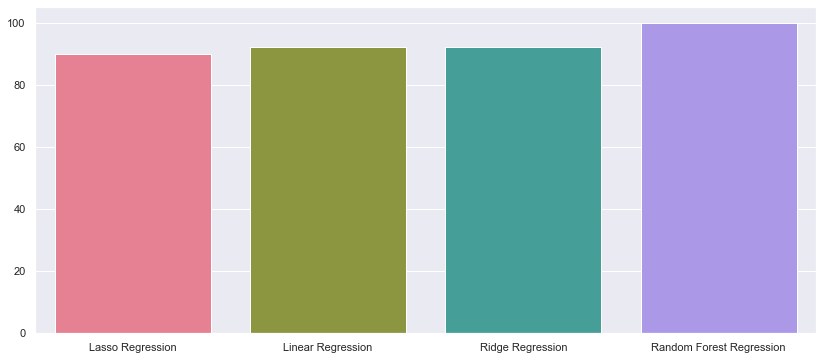

In [247]:
Accuracy = [90, 92, 92, 100]

models = [
    "Lasso Regression",
    "Linear Regression",
    "Ridge Regression",
    "Random Forest Regression",
]
plt.figure(figsize=(14, 6))
sns.barplot(models, Accuracy, palette="husl")

<h3 style="color:brown;"> Twitter Sentiment Analysis for Uber</h3>

<p style="color:#000080;">Twitter Sentiment analysis is used to find the sentiments or emotions of people behind the tweet. A review of a person/customer is analyzed via the tweets which helps the companies to further understand what review does a customer has about the product or service provided by the company.</p>


<p style="color:#000080;">From the time Twitter sentiment analysis has started, it has been beneficial a lot for companies to extract, quantify & understand what value their product holds from a customer’s perspective. Although Twitter sentiment analysis can be done for any domains, the domain chosen is Uber. The reason for choosing Uber is because of the vast data which can be collected from the cab users. That can be later used, to extract the tweets to understand if the customers are happy or aren’t with the services & what issues they are facing.</p>

In [248]:
# Twitter API config
twitterApiKey = "jvgmVKPBFGGhudPZIXPDEJQdP"
twitterApiSecret = "jzzHZzuK67h56vgxOlSqjBpHMZv2JHBJSlyaF8NfyMwUA3IYlD"
twitterApiAccessToken = "856986866393862144-aLs7Xyep8xx1OL8NYyvmAKUTyOAZ95R"
twitterApiAccessTokenSecret = "PXWYugQSkeTOnW1c1XiF7nfsbQAmgbxlu6hYqri4DFSpB"

<p style="color:#000080;">We are making an authentication call with Tweepy so we can call a function to retrieve the latest tweets from the specified account.</p>

In [249]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit=True)

In [250]:
twitterAccount = "uber"

<p style="color:#000080;">Now we are going to retrieve the last 1000 Tweets & replies from the specified Tweeter account.</p>

In [251]:
tweets = tweepy.Cursor(
    twetterApi.user_timeline,
    screen_name=twitterAccount,
    count=None,
    since_id=None,
    max_id=None,
    trim_user=True,
    exclude_replies=True,
    contributor_details=False,
    include_entities=False,
).items(1000)

<p style="color:#000080;"> we are going to create Pandas Data Frame from it.</p>

In [252]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["Tweet"])
df.head()

,Tweet
0,Your Gator-ri...
1,This #Hallowe...
2,A heartwarmin...
3,RT @dkhos: Cl...
4,Proud to part...


<p style="color:#000080;">Before we start our sentiment analysis it is a good idea to clean up each tweets from an unnecessary data first.We are going to create a cleanUpTweet function that will:
1.remove mentions 2.remove hashtags 3.remove retweets 4.remove urls</p>    

In [253]:
# Cleaning the tweets


def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r"@[A-Za-z0-9_]+", "", txt)
    # Remove hashtags
    txt = re.sub(r"#", "", txt)
    # Remove retweets:
    txt = re.sub(r"RT : ", "", txt)
    # Remove urls
    txt = re.sub(r"https?:\/\/[A-Za-z0-9\.\/]+", "", txt)
    return txt

<p style="color:#000080;">And now we are going to apply it for all the Tweets in our Pandas Data Frame.</p>

In [254]:
df["Tweet"] = df["Tweet"].apply(cleanUpTweet)

<p style="color:#000080;">We are also going to build a couple more functions to calculate the subjectivity and polarity of our tweets.</p>

In [255]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity


def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

<p style="color:#000080;">And now we are going to apply these functions to our data frame and create two new features in our data frame Subjectivity and Polarity.</p>

In [256]:
df["Subjectivity"] = df["Tweet"].apply(getTextSubjectivity)
df["Polarity"] = df["Tweet"].apply(getTextPolarity)

In [257]:
df.head(50)
# The below command will remove all the rows with the Tweet column equals to "".
df = df.drop(df[df["Tweet"] == ""].index)

<p style="color:#000080;">We can see that we have a calculated score for the subjectivity and polarity in our data frame.
Now let's build a function and categorize our tweets as Negative, Neutral and Positive. </p>

In [258]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

<p style="color:#000080;">And apply this functiona and create another feature in our data frame called Score.</p>

In [259]:
df["Score"] = df["Polarity"].apply(getTextAnalysis)

Here is our data frame with our Tweets, Subjectivity, Polarity and Score for all our Tweets.

In [260]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,Your Gator-ri...,0.000000,0.000000,Neutral
1,This Hallowee...,0.000000,0.000000,Neutral
2,A heartwarmin...,0.000000,0.000000,Neutral
3,Climate is a ...,0.000000,0.000000,Neutral
4,Proud to part...,0.700000,0.600000,Positive
5,"Sometimes, th...",0.000000,0.000000,Neutral
6,"From ""Uber C...",0.300000,0.075000,Positive
7,We built Veri...,1.000000,0.375000,Positive
8,Welcome to th...,0.900000,1.000000,Positive
9,Allyship can ...,0.500000,0.500000,Positive


<p style="color:#000080;">Let;s now take all positive tweets and calculate the percentage of positive tweets from all the tweets in our data frame</p>

In [261]:
positive = df[df["Score"] == "Positive"]

print(str(positive.shape[0] / (df.shape[0]) * 100) + " % of positive tweets")

59.09090909090909 % of positive tweets


<p style="color:#000080;">We can now visualise positive, negative, neutral tweets using Matplotlib.</p>

<BarContainer object of 3 artists>

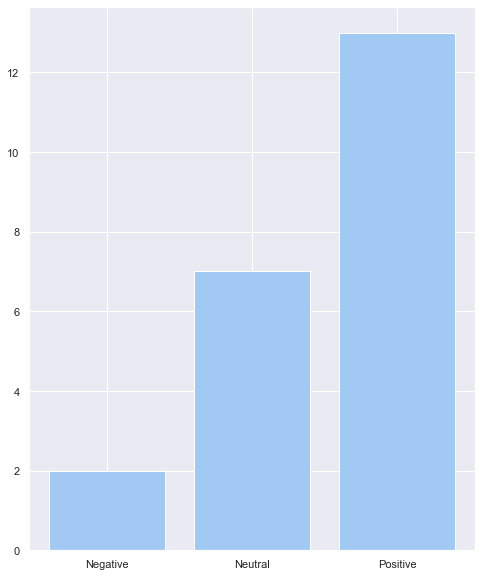

In [262]:
labels = df.groupby("Score").count().index.values

values = df.groupby("Score").size().values

plt.bar(labels, values)

<p style="color:#000080;">We can see how Negative, Neutral and Positive tweets spread on this account.
We can also visualise the same information by displaying the exact values of subjectivity and polatiry on the graph.</p>

<p style="color:#000080;">We can also calculate the percentage of objective tweets.</p>

<p style="color:#000080;">At the end we can also generate a wrod cloud to see the themes and most common words used in the tweets we were analysing.</p>

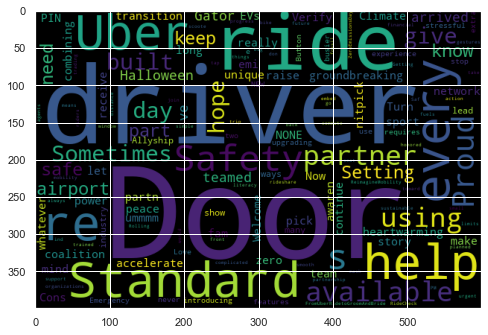

In [263]:
# Creating a word cloud
words = " ".join([tweet for tweet in df["Tweet"]])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

<h3 style="color:brown;"> Clustering to analyze ride-sharing data</h3>

<p style="color:#000080;">
Clustering is the process of dividing the datasets into groups, consisting of similar data-points”. Clustering is a type of unsupervised machine learning, which is used when you have unlabeled data.
Here, we have applied a K-Means clustering algorithm whose main goal is to group similar elements or data points into a cluster. “K” in K-means represents the number of clusters.
</p>

<h4 style="color:brown;">
How these centroids helpful for Uber?</h4>
<p style="color:#000080;">
<li style="color:#000080;">Uber can use these centroids as their hubs. Whenever Uber received a new ride request, they can check the closeness with each of these centroids. Whichever particular centroid is closer then the Uber can direct the vehicle from that particular location to the customer location.</li>
<li style="color:#000080;">Uber has many drivers and providing services to many locations. If Uber knows the hub (particular centroid), and if they are getting a lot of ride request then strategically they can place their driver’s in good location wherein probability of getting a ride request are huge. This will help Uber to serve the customer faster as vehicles are placed closer to the location and also it help to grow their business.</li>
<li style="color:#000080;">Uber can use these centroids for optimal pricing by analyzing which cluster deals with maximum requests, peak times etc. Suppose, if they don’t have too many vehicles to be sent to a particular location (more demand), then they can do optimal pricing as demand is high and supply is less.</li></p>


In [264]:
df_rides_knn = df_rides
clus = df_rides_knn[["latitude", "longitude"]]
clus.dtypes

latitude     float64
longitude    float64
dtype: object

<p style="color:#000080;">Performing k-Means Clustering:Assigning a number of cluster in K-Means algorithm.Here we are going to find 10 clusters.
We are storing cluster centroids in a different object called centroids.</p>

In [265]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(clus)
centroids = kmeans.cluster_centers_
centroids

array([[ 42.35190096, -71.033     ],
       [ 42.3588    , -71.0707    ],
       [ 42.3505    , -71.1054    ],
       [ 42.3647    , -71.0542    ],
       [ 42.3503    , -71.081     ],
       [ 42.35325971, -71.05506601],
       [ 42.36557548, -71.06402563],
       [ 42.3398    , -71.0892    ],
       [ 42.3519    , -71.0643    ],
       [ 42.3429    , -71.1003    ]])

In [266]:
centroids = kmeans.cluster_centers_
clocation = pd.DataFrame(centroids, columns=["Latitude", "Longitude"])
print(clocation.head())

    Latitude  Longitude
0  42.351901   -71.0330
1  42.358800   -71.0707
2  42.350500   -71.1054
3  42.364700   -71.0542
4  42.350300   -71.0810


<p style="color:#000080;">We can see all the centroids pertains to each cluster in the above scatterplot. However, this doesn’t show any meaningful information.</p>

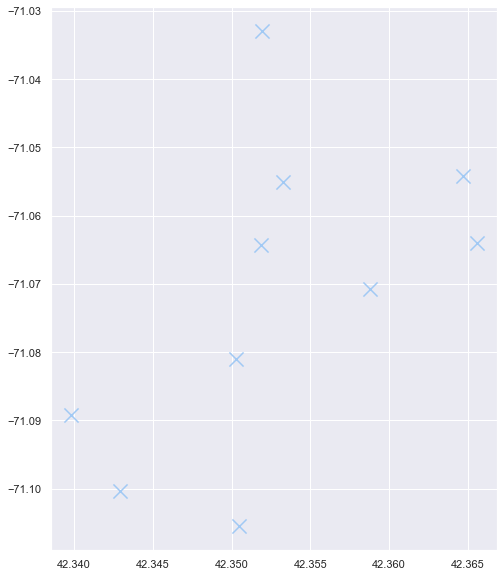

In [267]:
plt.scatter(clocation["Latitude"], clocation["Longitude"], marker="x", s=200)
label = kmeans.labels_
data_new = df_rides_knn.copy()
data_new["Clusters"] = label

Text(0.5, 0.98, 'Number of locations for each cluster')

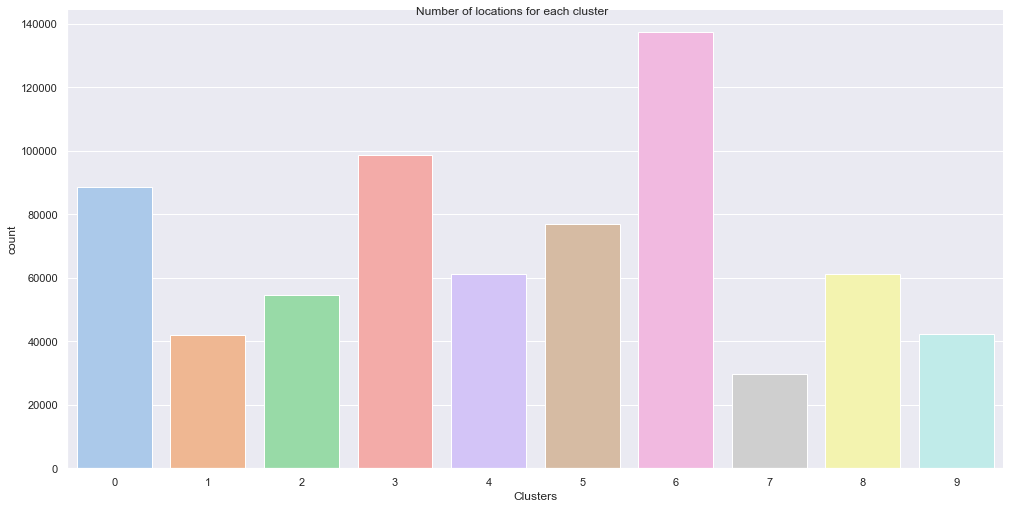

In [268]:
p = sns.factorplot(data=data_new, x="Clusters", kind="count", size=7, aspect=2)
p.fig.suptitle(
    "Number of locations for each cluster", fontsize=12, fontdict={"weight": "bold"}
)

In [269]:
count_3 = 0
count_0 = 0
for value in data_new["Clusters"]:
    if value == 3:
        count_3 += 1
    if value == 0:
        count_0 += 1
print(count_0, count_3)

88546 98690


<p style="color:#000080;">If Uber gets a new ride request (as getting their new location through longitude and latitude) then pass the latitude and longitude value, then it would predict which cluster from the vehicle should go?</p>


<p style="color:#000080;">Passing the new request latitude and longitude value (40.86,-75.56). The new request will be assigned to cluster 2 as it’s a distance from the centroid of cluster 2 is minimum as compared to other centroids. The vehicle will come from cluster 2.</p>

In [270]:
new_location = [(40.86, -75.56)]
lo = kmeans.predict(new_location)
print(lo)

[2]


<p style="color:#000080;">Let’s plot the centroid in google map (latitude & longitude) and visualize
Here, we used a folium library for generating the map. Passing the centroids and map the location</p>

In [271]:
centroid = clocation.values.tolist()

map = folium.Map(location=[42.3519, -71.0643], zoom_start=13)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup=centroid[point]).add_to(map)

map

<h3 style="color:brown;">Conclusion</h3>


<h4 style="color:brown;">Build a model that predicts the price of a commute during different conditions</h4>

<p style="color:#000080;">
Using ML Models, we have finally reached various conclusions that weather plays important role in Uber ride price. Such discoveries can bring new light to further studies in fields such as sharing economy or econometrics.</p>


<h4 style="color:brown;">Clustering to analyze ride-sharing data</h4>
<p style="color:#000080;">In a real-time, we have more centroids (latitude and longitude) as Uber presence in many countries and giving services for many locations. These centroids will act as a hub for all their ride requests in a defined area.
The above shows how K-Means clustering helps Uber in optimal pricing, the optimal position of cars in order to serve their customer faster and grow their business.</p>


<h4 style="color:brown;">Real time twitter sentiment analysis for Uber to predict if customers are happy</h4>

<p style="color:#000080;">Our analysis shows that people generally tweet positively towards Uber.This is a good sign for the ridesharing industry, as any positive sentiment (however small) is good. However, our sample size was extremely small. Large dataset should be used for further research.</p>


